<a href="https://colab.research.google.com/github/Deyonrose/labexercises/blob/AML/2348513_AML_prog3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/Program_3b_dataset.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
predictors = df[['variance', 'skewness', 'curtosis','entropy']]

In [7]:
y = df['class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(predictors, y, test_size=0.30, random_state=42)

In [9]:
logistic_model = LogisticRegression()

In [10]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_test_pred = logistic_model.predict(X_test)

In [12]:
y_train_pred = logistic_model.predict(X_train)

In [13]:
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

In [14]:
print("Accuracy:", accuracy)

Accuracy: 0.9878640776699029


In [15]:
print("Classification Report on Training Set:\n", classification_report(y_train, y_train_pred))
# Display the confusion matrix for training set
print("Confusion Matrix on Training Set:\n", confusion_matrix(y_train, y_train_pred))
# Display the classification report for testing set
print("Classification Report on Testing Set:\n", classification_report(y_test, y_test_pred))

Classification Report on Training Set:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       533
           1       0.98      1.00      0.99       427

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960

Confusion Matrix on Training Set:
 [[526   7]
 [  1 426]]
Classification Report on Testing Set:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



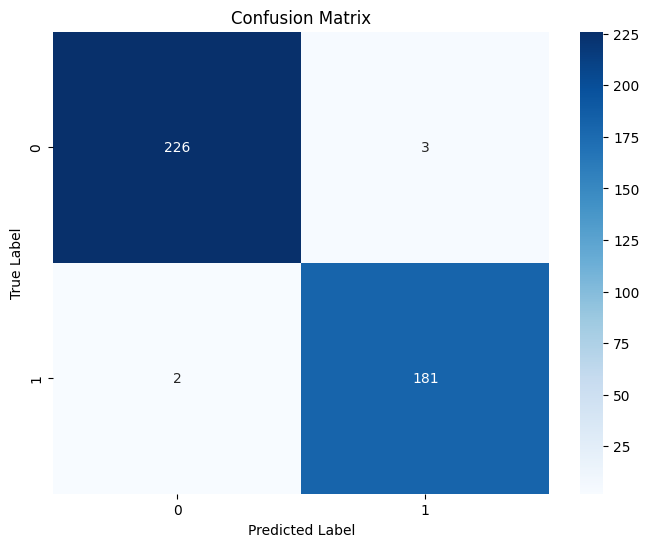

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()